## RANDOM FOREST

La idea principal detrás de los bosques aleatorios es construir múltiples árboles de decisión durante el entrenamiento y combinar sus predicciones para obtener una predicción final. Cada árbol en el bosque se entrena de forma independiente utilizando un subconjunto aleatorio de características y datos de entrenamiento. Luego, para hacer una predicción, se realiza una votación entre todos los árboles del bosque y se selecciona la clase más común en el caso de clasificación, o se calcula la media en el caso de regresión.

**Los bosques aleatorios tienen varias ventajas:**

Son robustos frente al sobreajuste, ya que la combinación de múltiples árboles ayuda a reducir el impacto del ruido y la variabilidad en los datos.
Pueden manejar conjuntos de datos grandes con muchas características y observaciones.
No requieren mucha afinación de hiperparámetros y son relativamente fáciles de usar.

**IMPORTAMOS LIBRERIAS**

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

**DEFINIMOS NUESTRO DATASETS Y MOTRAMOS INFORMACIÓN**

In [58]:
planets = seaborn.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [59]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


**LIMPIAMOS EL DATA-FRAME**

In [60]:
select_columns = planets.select_dtypes(include=['int', 'float']).columns
planets[select_columns] = planets[select_columns].fillna(planets[select_columns].mean())
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  1035 non-null   float64
 3   mass            1035 non-null   float64
 4   distance        1035 non-null   float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


##  CREAMOS NUESTRO BOSQUE ALEATORIO

**(n_estimators): Número de árboles en el bosque.**

**(criterion): Medida de calidad de la partición (gini o entropy).**

**(max_depth): Profundidad máxima de los árboles.**

**(min_samples_split): Mínimo de muestras para dividir un nodo.**

**(min_samples_leaf): Mínimo de muestras en un nodo hoja.**

**(max_features): Máximo de características consideradas en la división.**

**(bootstrap): Uso de muestreo con reemplazo (bootstrap).**

In [61]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [63]:
from sklearn.ensemble import RandomForestClassifier
forest_regressor = RandomForestClassifier(max_samples=2/3, oob_score=True)
forest_regressor.fit(planets.iloc[:, 2:4].values, planets['method'].values)
forest_regressor.predict(planets.iloc[:, 2:4])

d:\Descargas\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array(['Radial Velocity', 'Radial Velocity', 'Radial Velocity', ...,
       'Transit', 'Transit', 'Transit'], dtype=object)

**¿QUE TAN BUENO ES NUESTRO MODELO PREDICTIVO?**

In [65]:
forest_regressor.score(planets.iloc[:, 2:4].values, planets['method'].values)

0.9632850241545894

In [67]:
forest_regressor.oob_score_

0.9101449275362319

**GRAFICAMOS: (.estimators_)**

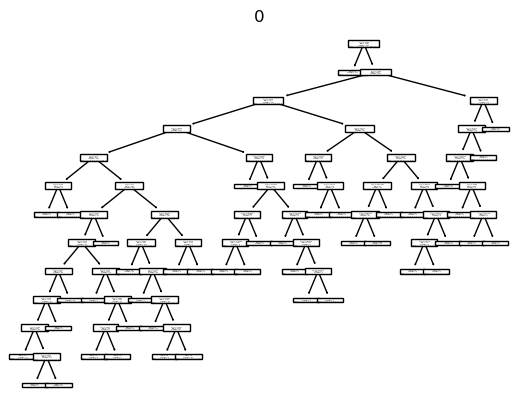

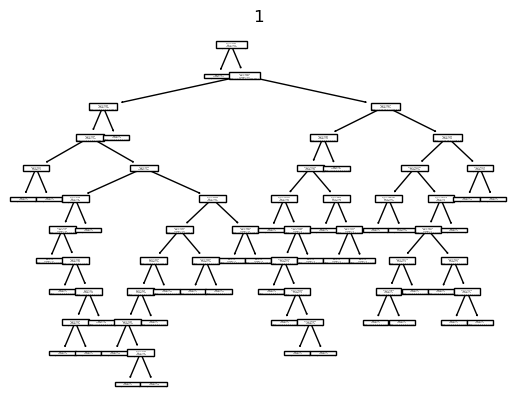

KeyboardInterrupt: 

In [68]:
from sklearn import tree
for i, forest in enumerate(forest_regressor.estimators_):
    tree.plot_tree(forest)
    plt.title(i)
    plt.show()